# Breast Cancer Prediction Project

Welcome to the Breast Cancer Prediction project! 🎯

In this beginner-friendly notebook, we'll walk through a step-by-step machine learning pipeline to predict whether a tumor is malignant or benign based on various features.

## 🔍 Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` for this purpose.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📥 Step 1: Load the Dataset

In [133]:
df=pd.read_csv("/content/Cancer_Data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## 🔍 Step 2: Explore the Dataset

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [135]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [136]:
df.shape

(569, 33)

In [137]:
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [138]:
categoricals = df.select_dtypes(include='object').columns
for col in categoricals:
    print(f"{col}:\n{df[col].value_counts().head(5)}\n")

diagnosis:
diagnosis
B    357
M    212
Name: count, dtype: int64



In [139]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [140]:
# Encode target
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


                               id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                

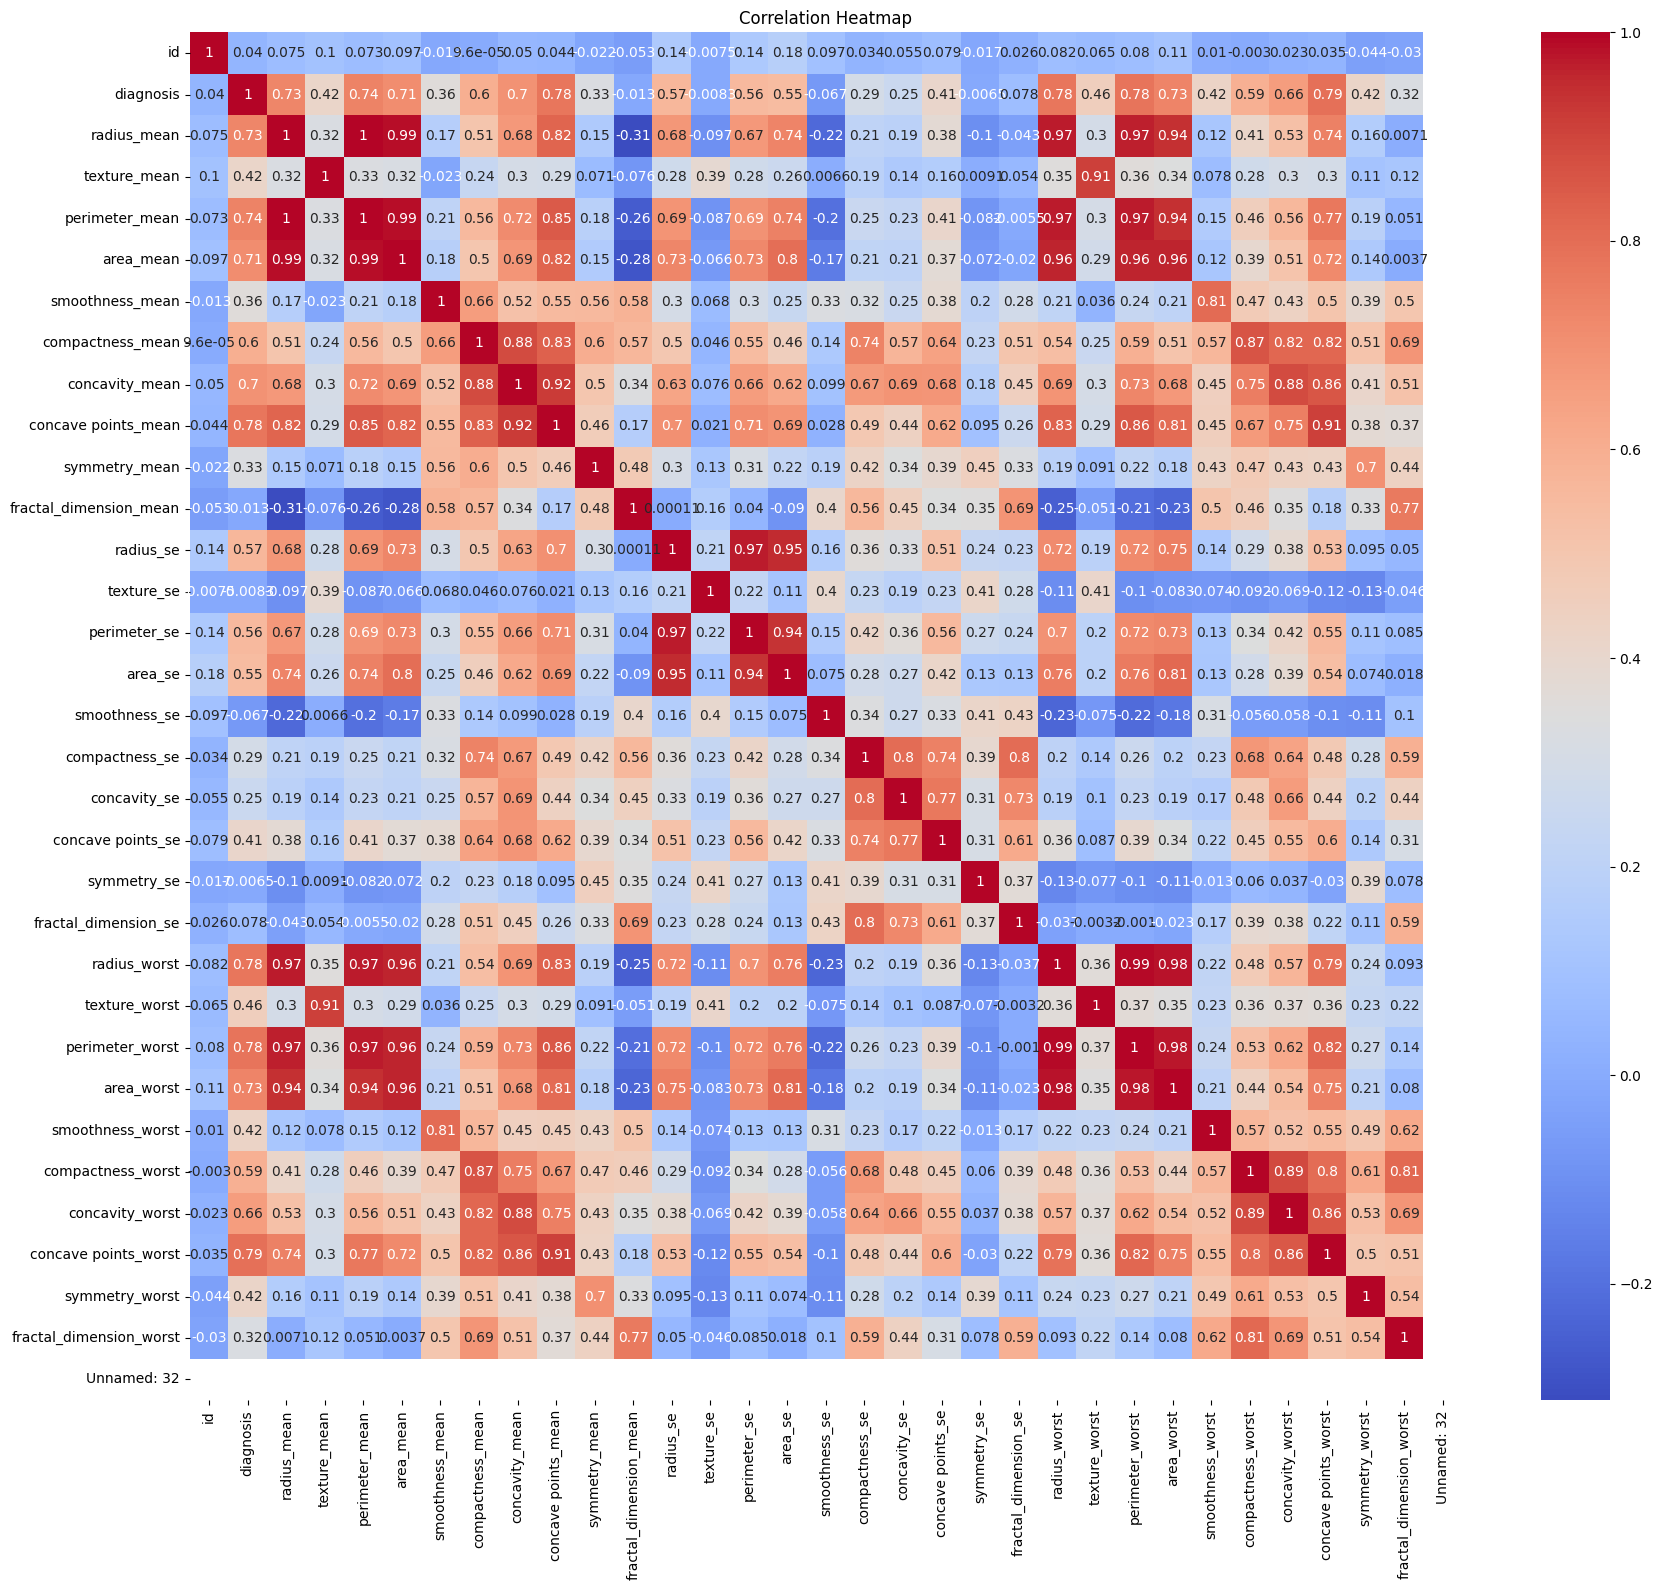

In [141]:
corr = df.corr(numeric_only=True)
print(corr)
plt.figure(figsize=(18,16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


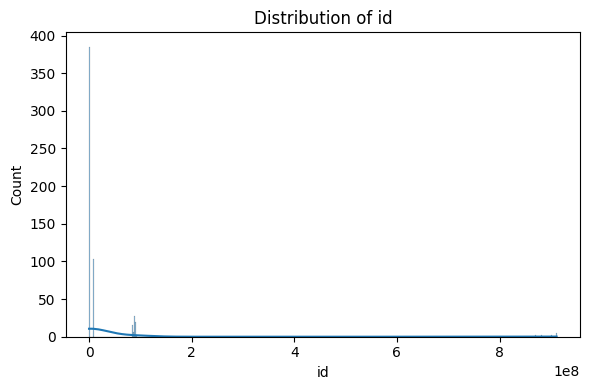

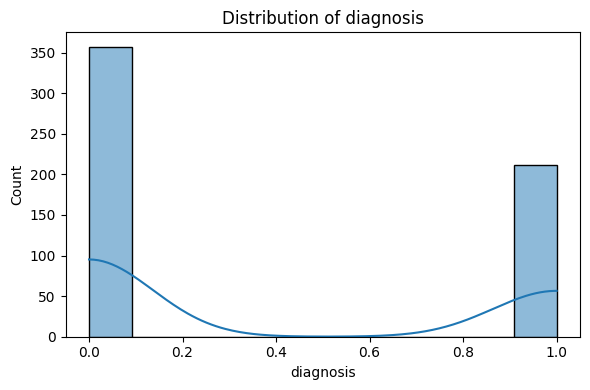

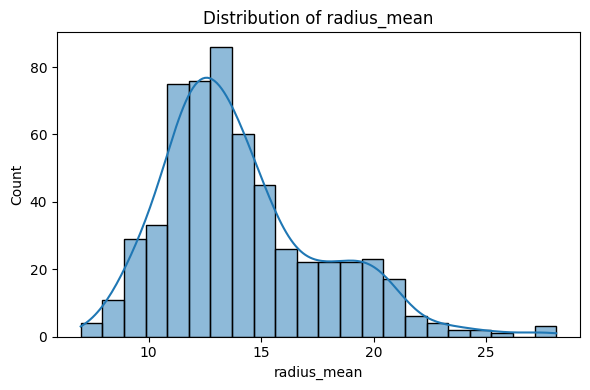

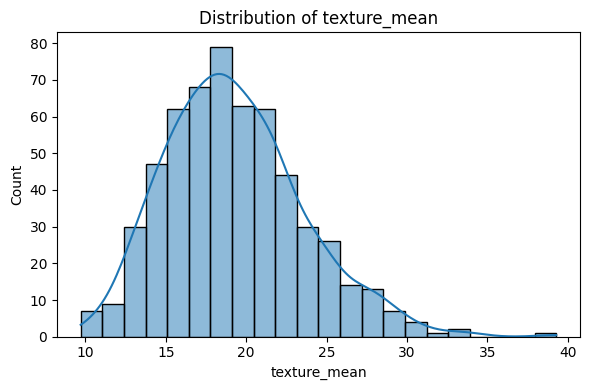

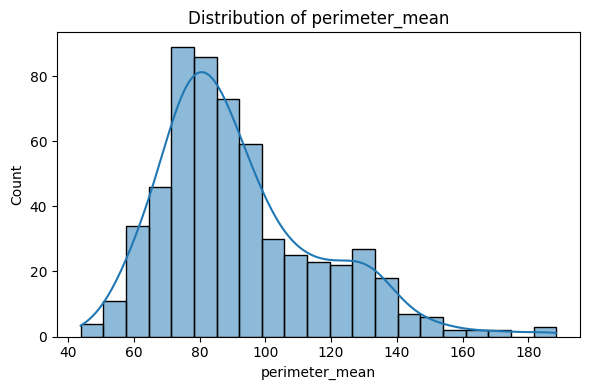

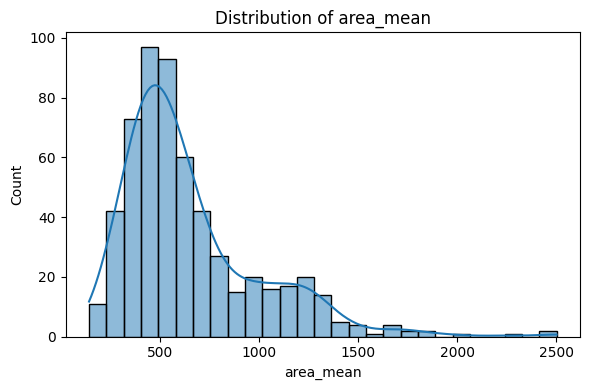

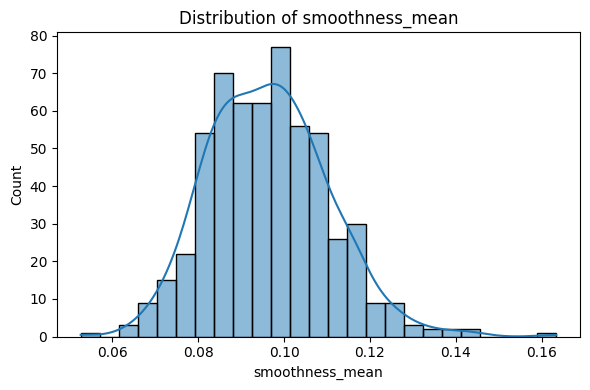

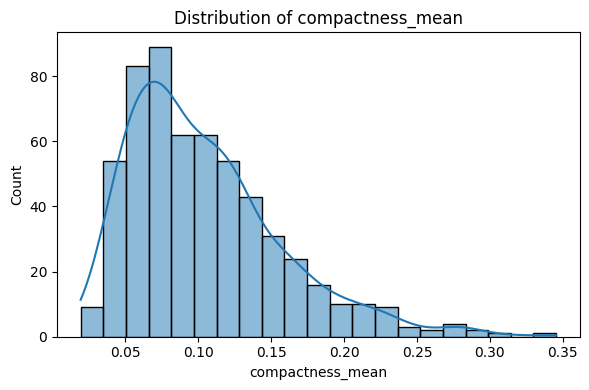

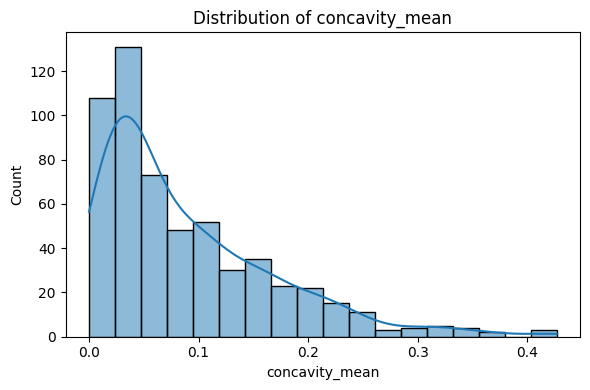

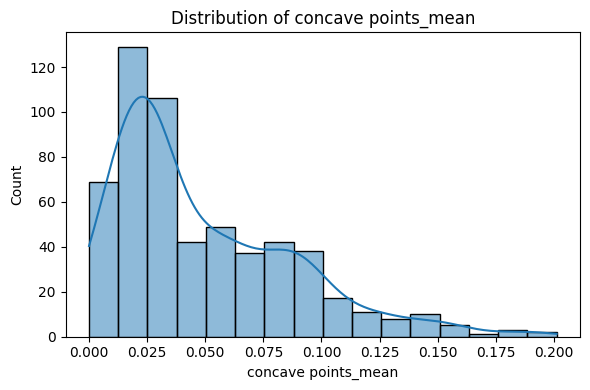

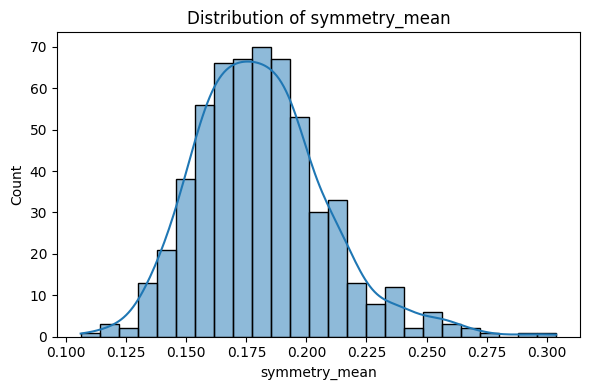

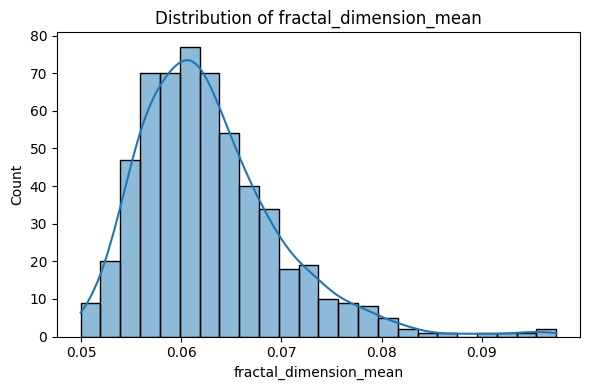

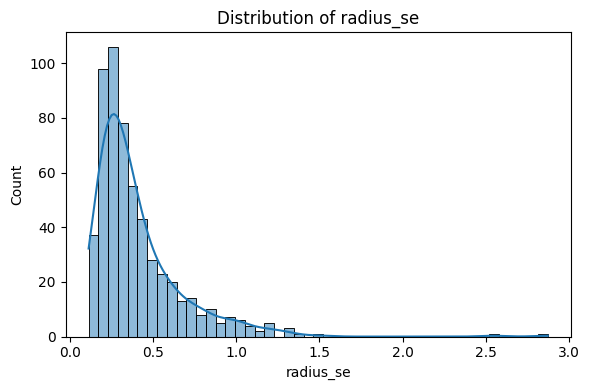

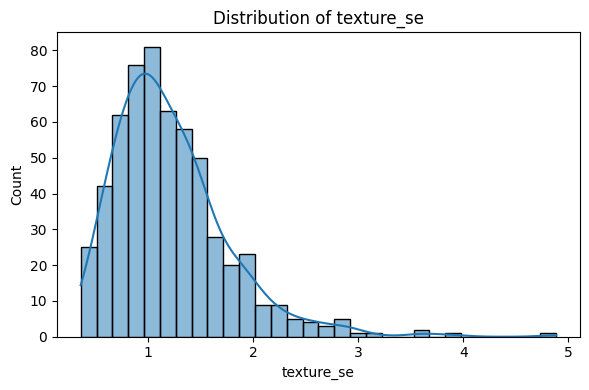

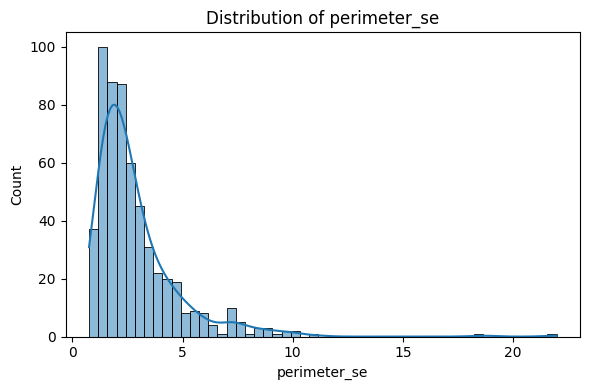

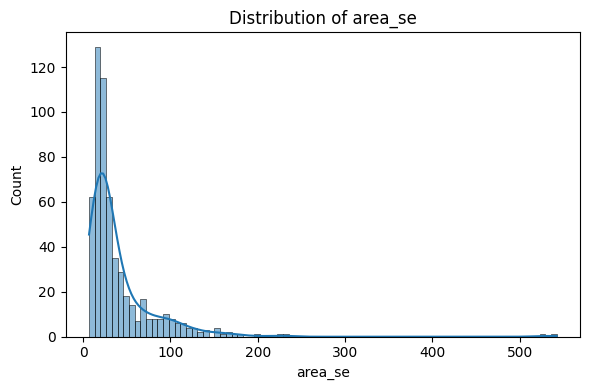

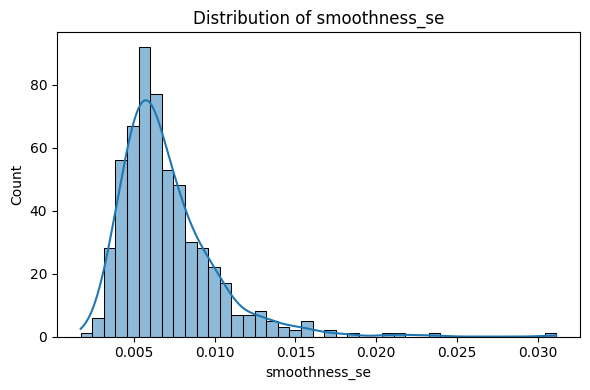

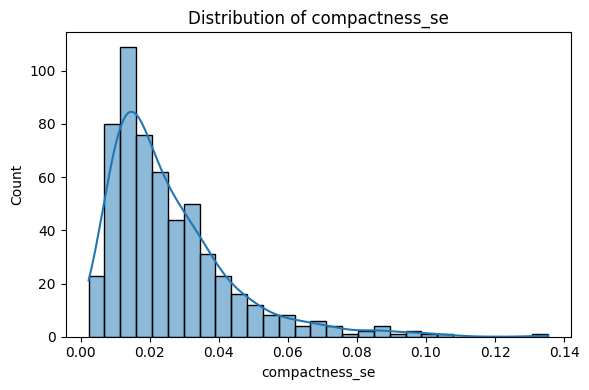

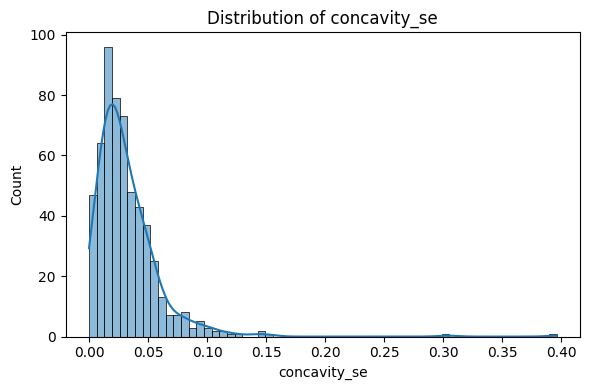

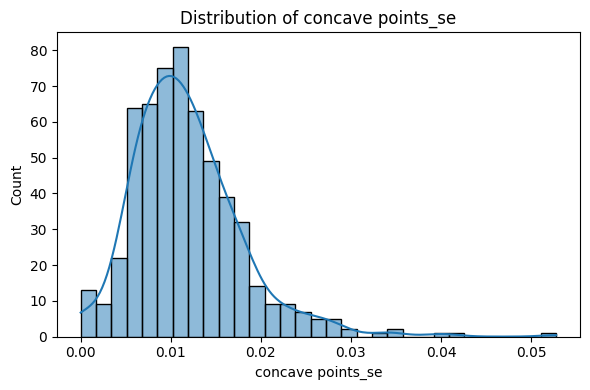

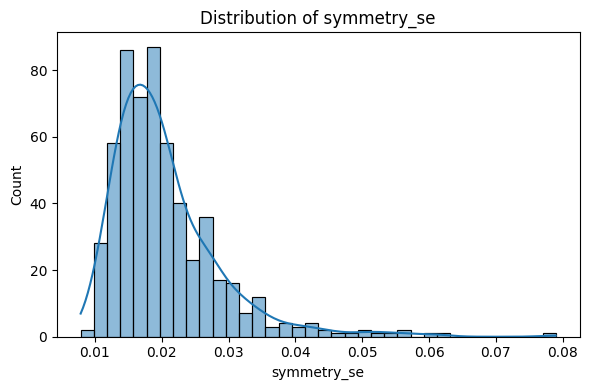

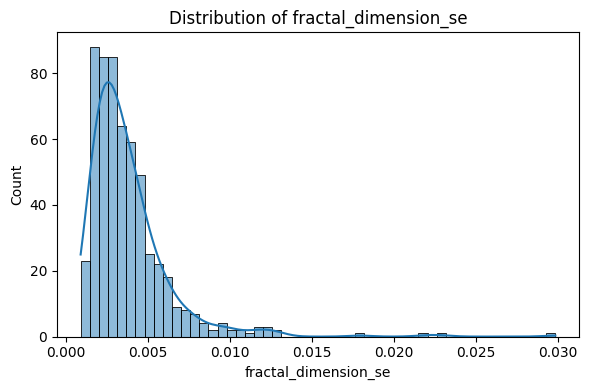

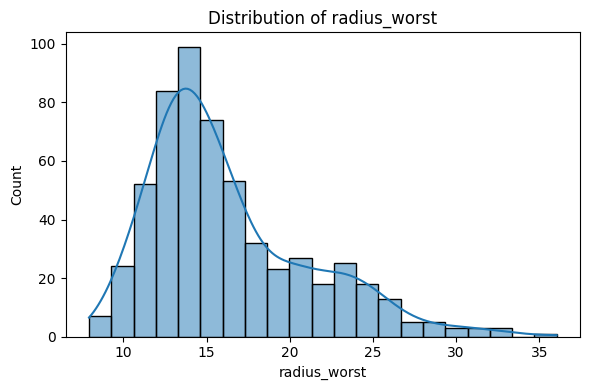

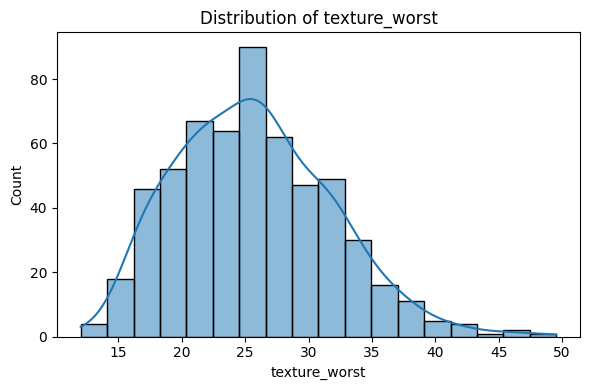

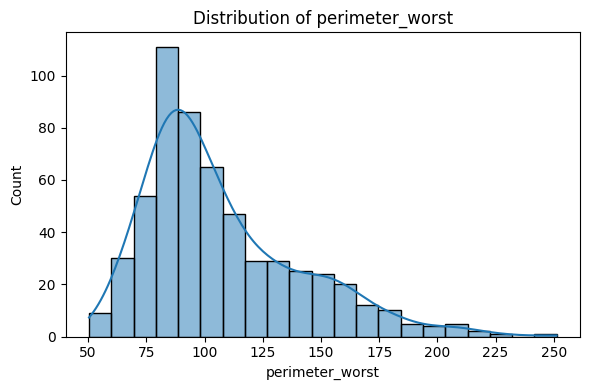

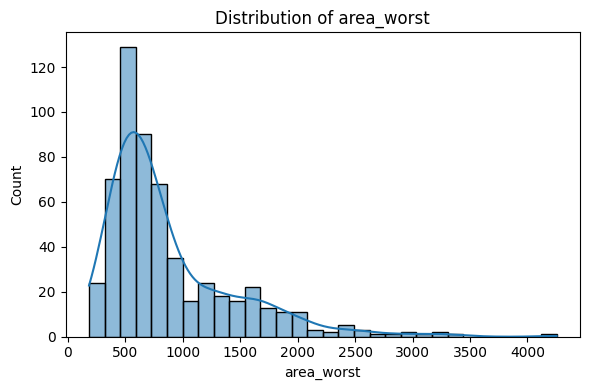

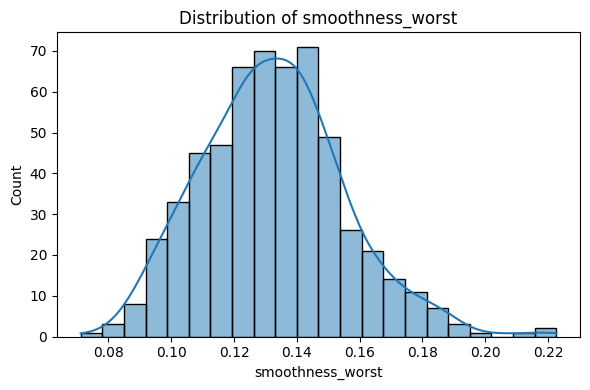

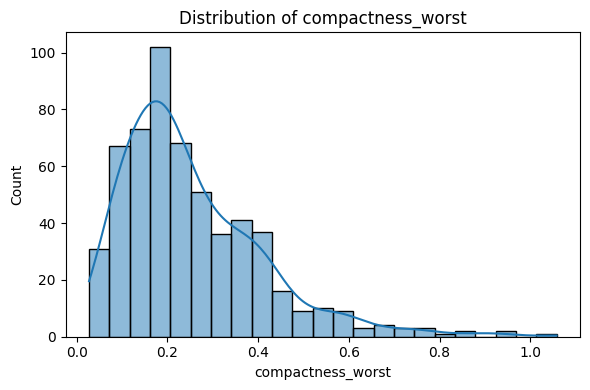

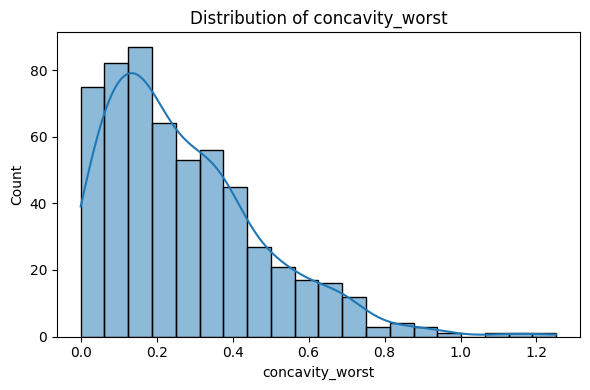

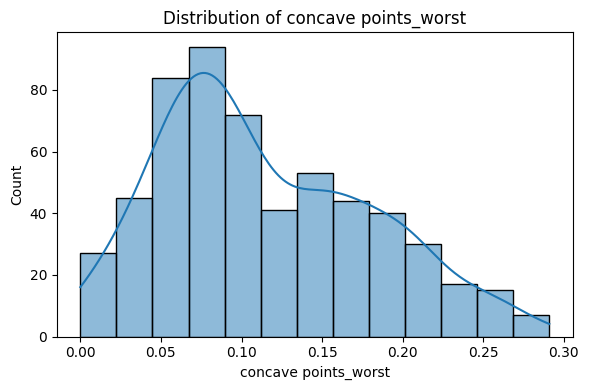

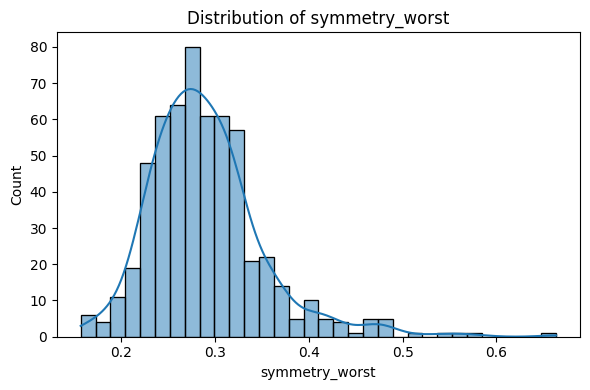

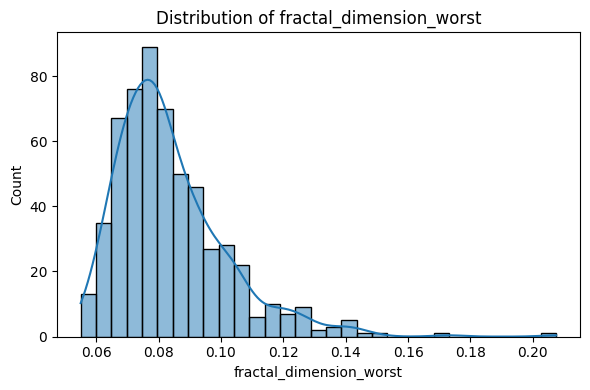

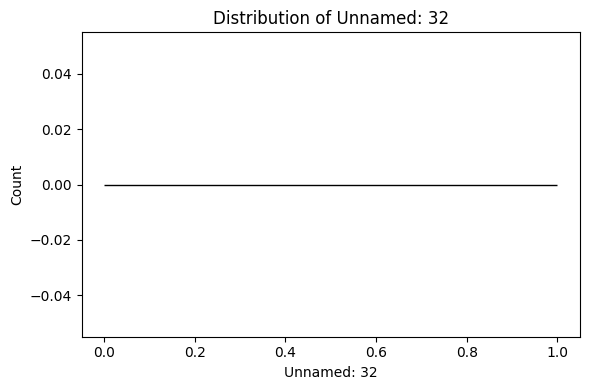

In [142]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [143]:
print(df['diagnosis'].isnull().sum())


0


In [144]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [145]:

df.columns = df.columns.str.strip()


In [146]:
top_corr = corr['diagnosis'].abs().sort_values(ascending=False)[1:11]
print("\nTop 10 Features correlated with diagnosis:")
print(top_corr)


Top 10 Features correlated with diagnosis:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


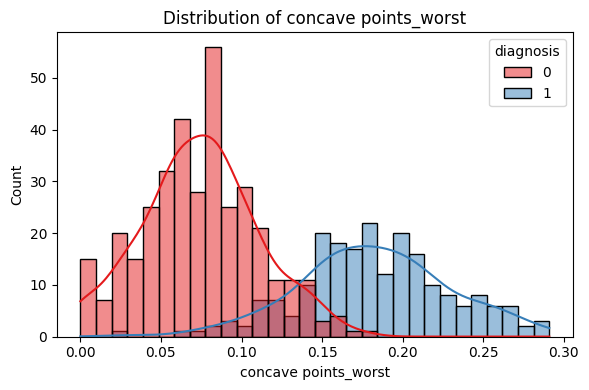

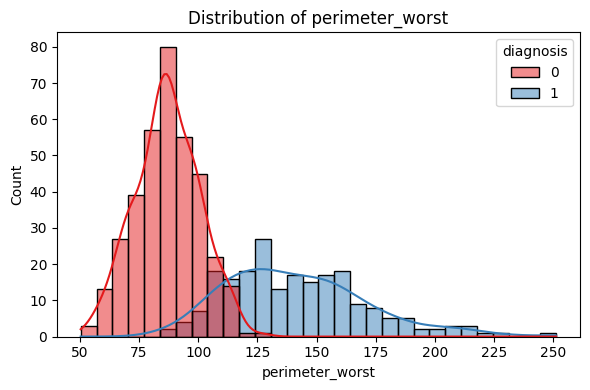

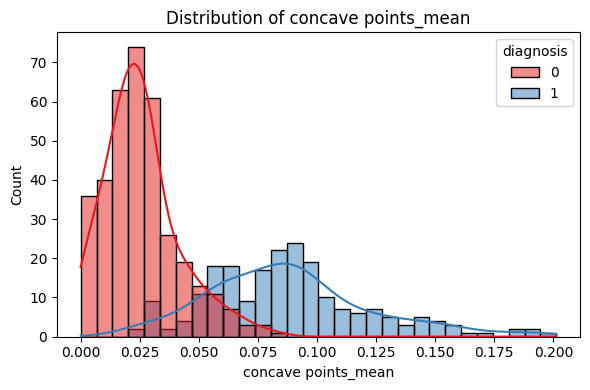

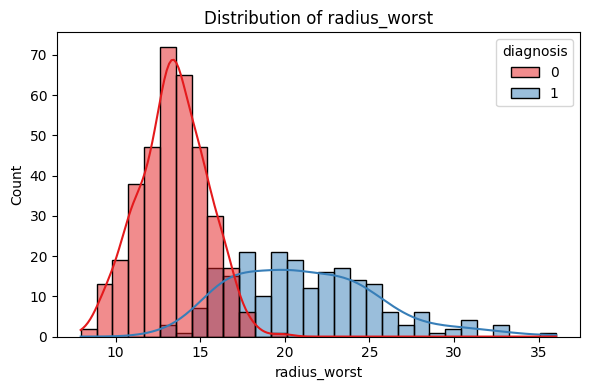

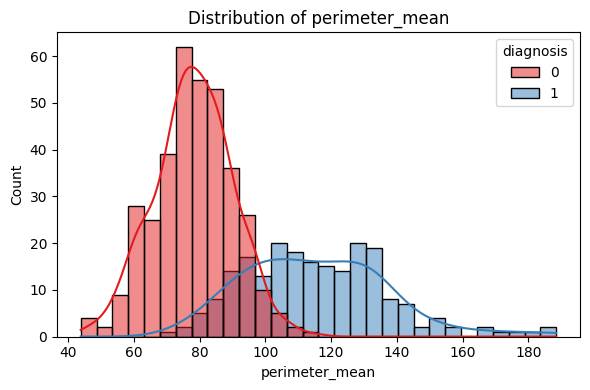

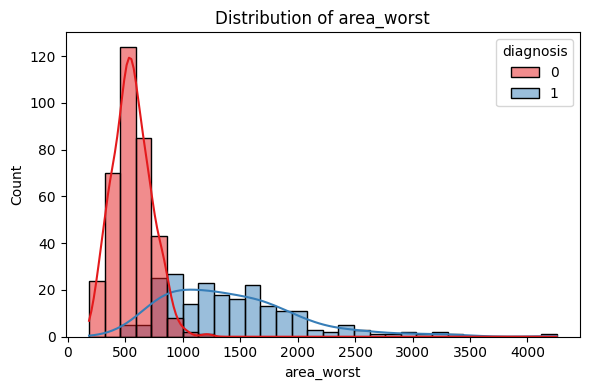

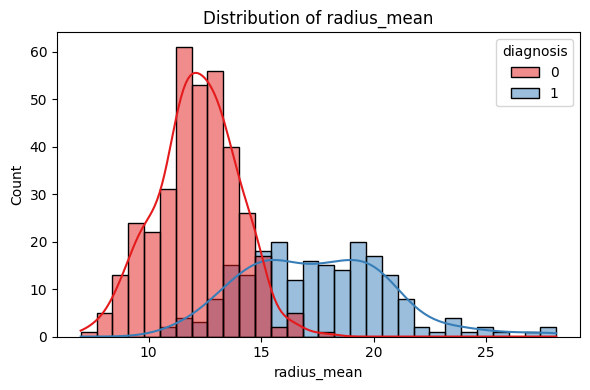

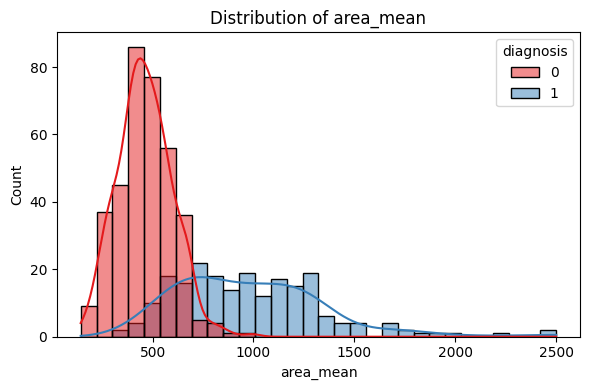

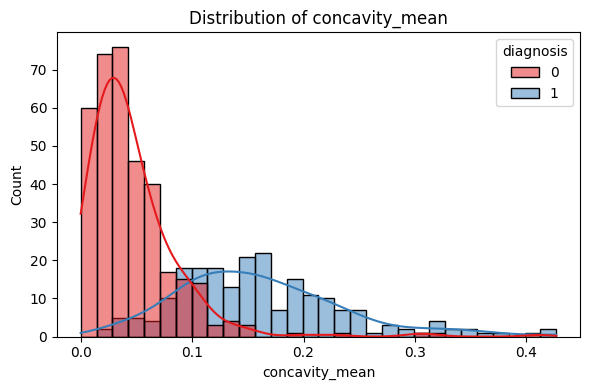

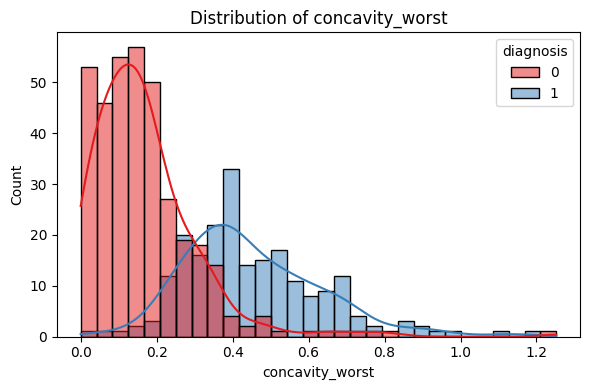

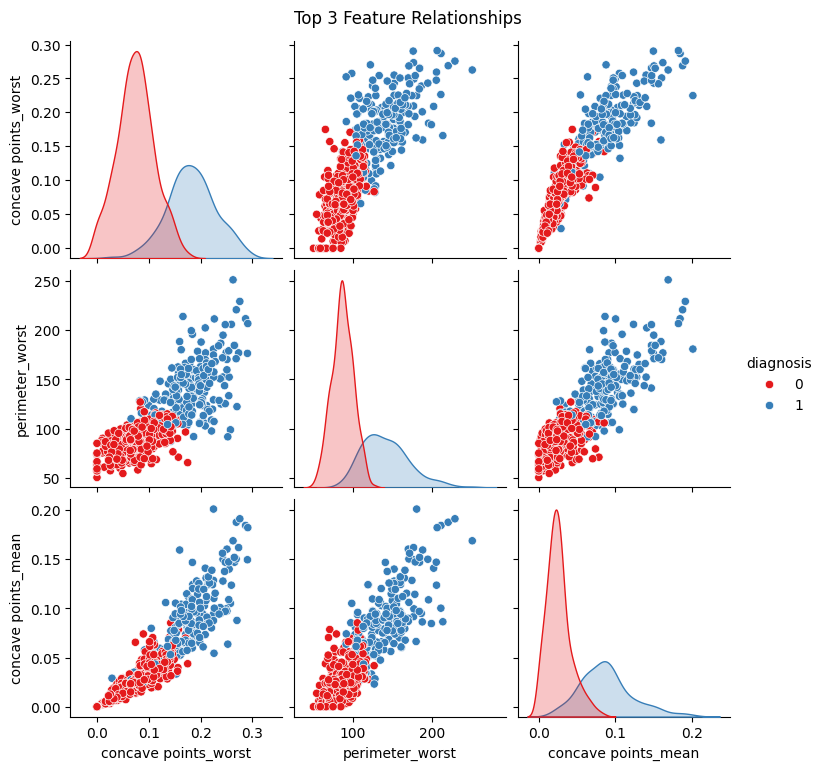

In [147]:
#  Visualizing key feature distributions
key_features = top_corr.index.tolist()

for col in key_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='diagnosis', kde=True, palette='Set1', bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# Pairplot of top 3 correlated features
sns.pairplot(df, vars=key_features[:3], hue='diagnosis', palette='Set1')
plt.suptitle("Top 3 Feature Relationships", y=1.02)
plt.show()

## 🧹 Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values.

In [148]:
# Drop the 'Unnamed: 32' column and 'id'

df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore', inplace=True)


In [149]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## 📊 Step 4: Visualize the Data

/tmp/ipython-input-150-2840573707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='Set2')


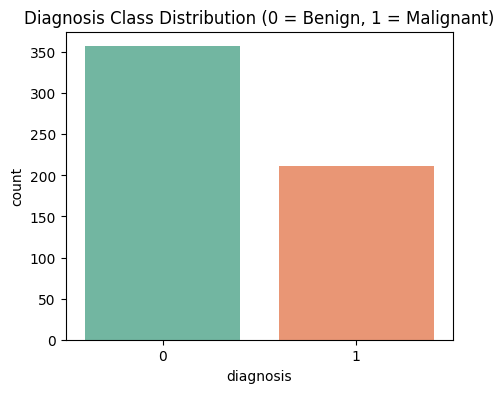

In [150]:
# 1. Diagnosis Class Distribution
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='diagnosis', palette='Set2')
plt.title("Diagnosis Class Distribution (0 = Benign, 1 = Malignant)")
plt.show()

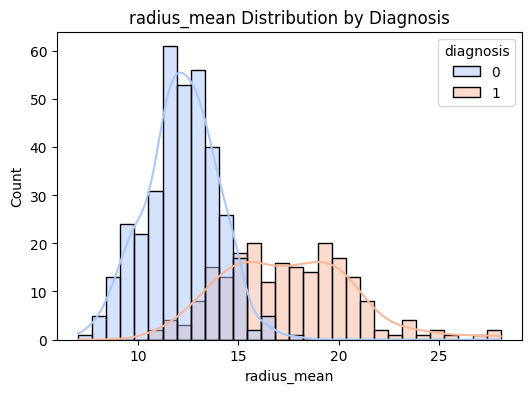

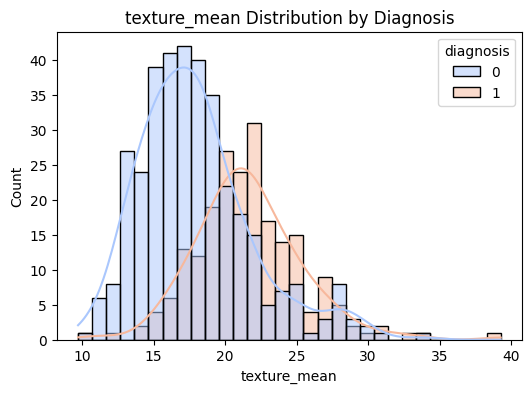

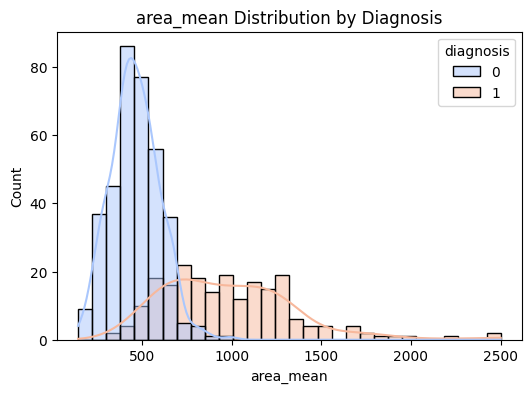

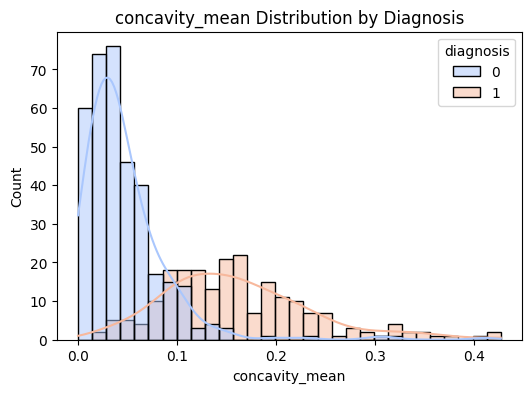

In [151]:
# 2. Histogram of a few key features
key_features = ['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean']

for col in key_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='diagnosis', bins=30, kde=True, palette='coolwarm')
    plt.title(f"{col} Distribution by Diagnosis")
    plt.show()


/tmp/ipython-input-152-3750437487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='Set3')


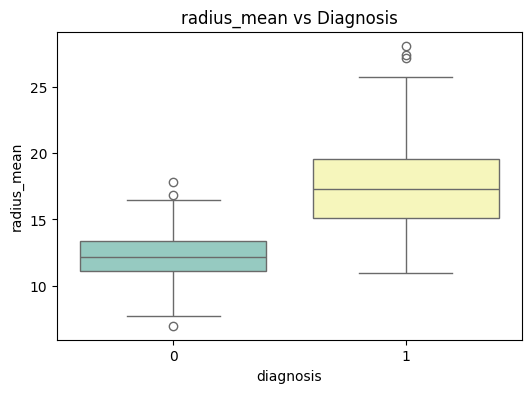

/tmp/ipython-input-152-3750437487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='Set3')


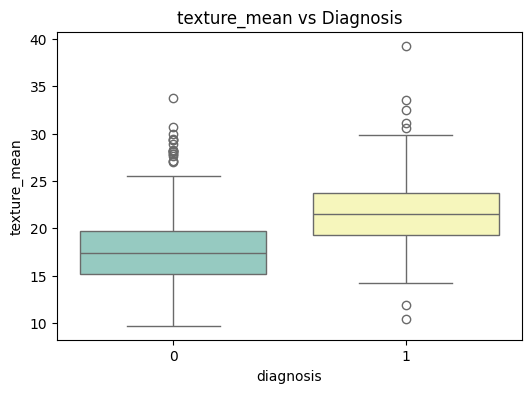

/tmp/ipython-input-152-3750437487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='Set3')


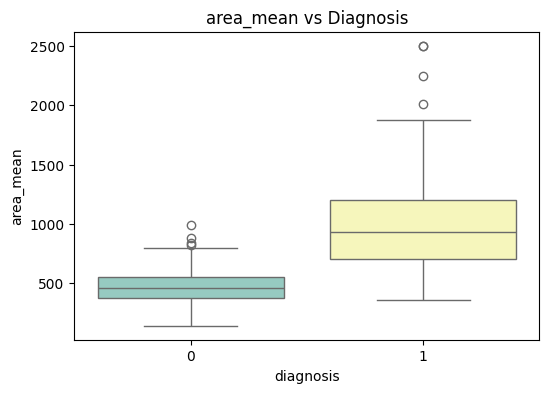

/tmp/ipython-input-152-3750437487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='Set3')


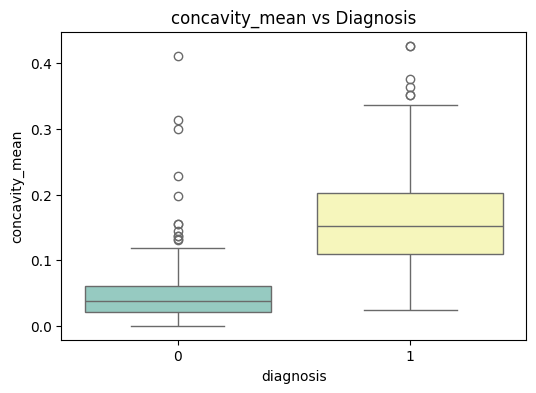

In [152]:
# 3. Box Plots
for col in key_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='diagnosis', y=col, data=df, palette='Set3')
    plt.title(f"{col} vs Diagnosis")
    plt.show()


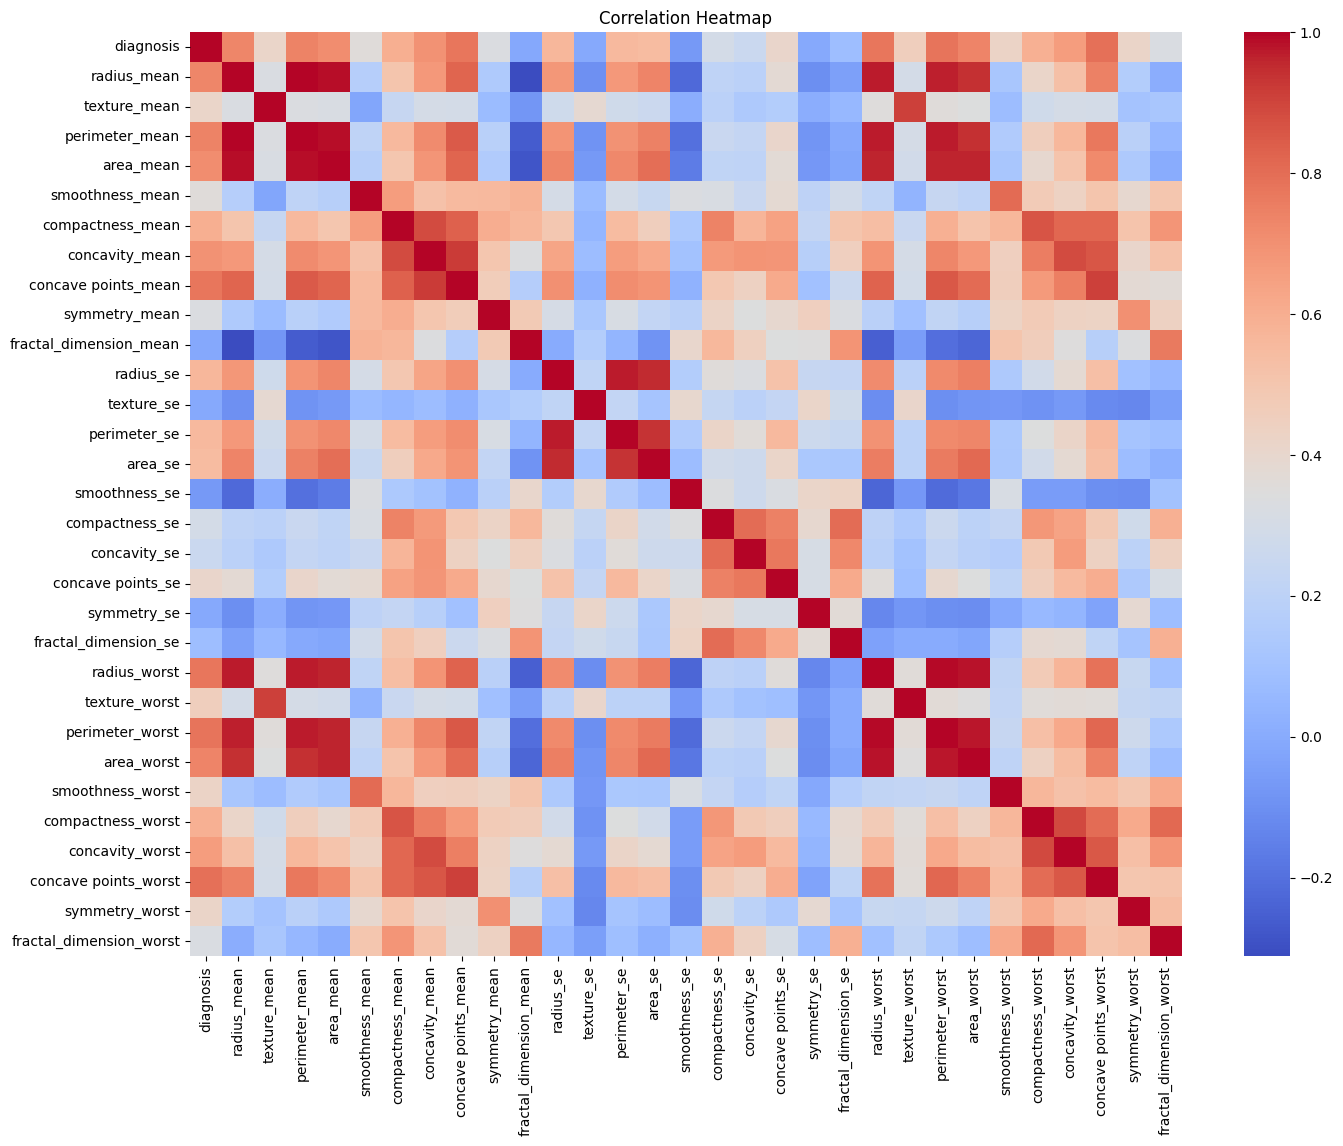

In [153]:
# 4. Correlation Heatmap
plt.figure(figsize=(16, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


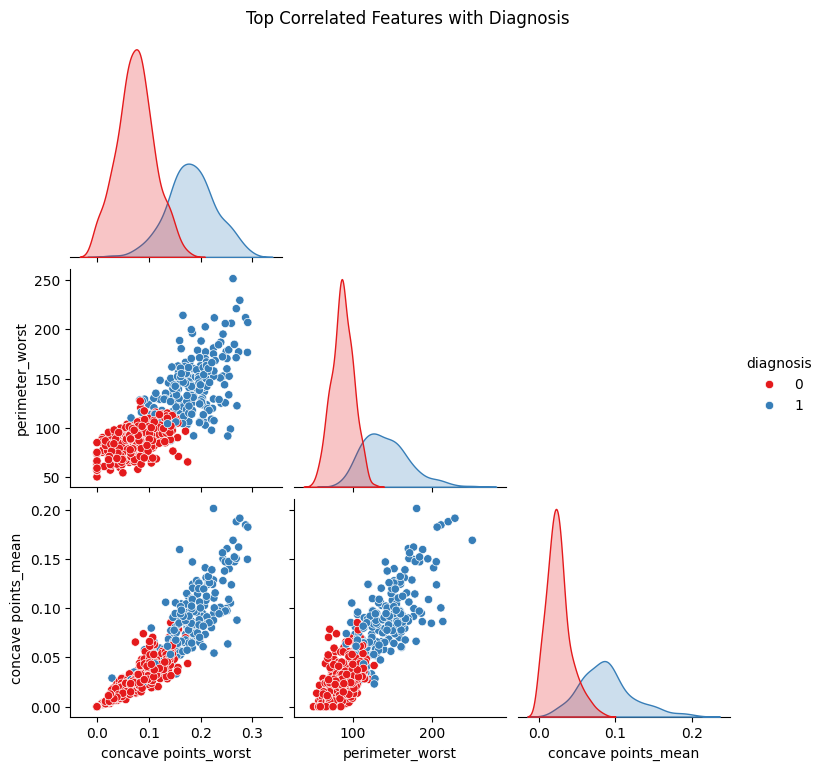

In [154]:
# 5. Pairplot of Top 3 Correlated Features with Diagnosis
top_corr = corr['diagnosis'].abs().sort_values(ascending=False)[1:4].index.tolist()

sns.pairplot(df, vars=top_corr, hue='diagnosis', palette='Set1', corner=True)
plt.suptitle("Top Correlated Features with Diagnosis", y=1.02)
plt.show()

## ⚙️ Step 5: Preprocess the Data

In [155]:
# Split features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [156]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [161]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🤖 Step 6: Train a Machine Learning Model

In [162]:
# Use Logistic Regression
# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

#  predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


## 🧪 Step 7: Evaluate the Model

✅ Accuracy: 0.9649122807017544

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


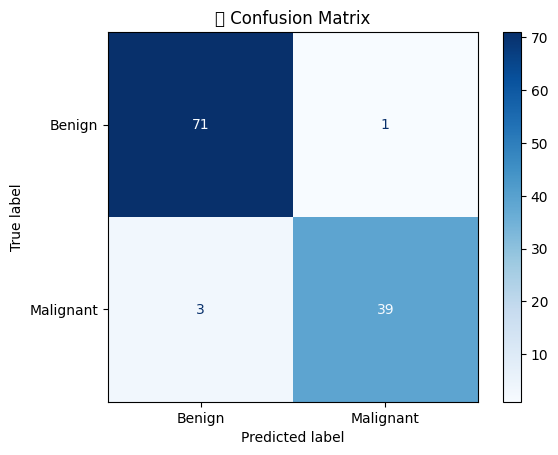

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


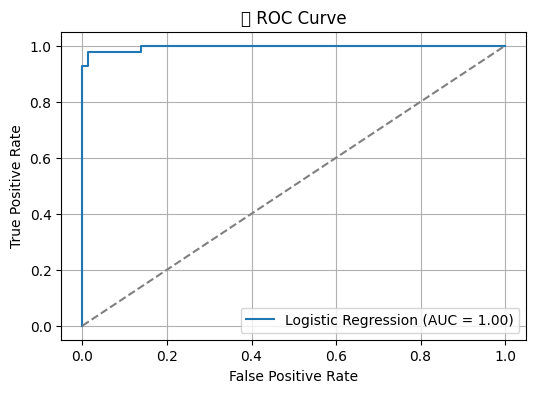

In [164]:
# 3. 📊 Accuracy & report
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))

# 4. 📉 Confusion Matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap="Blues")
plt.title("🧾 Confusion Matrix")
plt.show()

# 5. 🚀 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🔥 ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [165]:
import joblib

# Save the trained model
joblib.dump(model, 'logistic_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

## ✅ Conclusion

Awesome work! 🎉

You've successfully built a breast cancer prediction model using Logistic Regression. You explored the data, cleaned it, visualized it, trained a model, and evaluated its performance.

### 🚀 Next Steps
- Try different models like RandomForest or SVM
- Perform feature selection
- Tune hyperparameters for better accuracy